# Geometric Vectors - Escaping the Scalar Trap

**Based on:** [The Great Embedding](https://agussudjianto.substack.com/p/the-great-embedding-escaping-the)

This notebook demonstrates dimensionally-aware vector operations using PyTorch with GPU acceleration.

---

## Setup and Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from geometric_vector import (
    GeometricVector,
    create_housing_vector,
    GeometricVectorBatch,
    get_device
)

# Check GPU availability
device = get_device()
print(f"\nPyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")

Using GPU: NVIDIA GB10

PyTorch version: 2.9.1+cu129
CUDA available: True
CUDA version: 12.9


/home/asudjianto/jupyterlab/ga_verify/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:283: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  warnings.warn(


---
## Part 1: The Scalar Trap

### The Problem

Traditional machine learning treats data as raw scalar arrays, leading to **meaningless operations**:

In [2]:
# THE SCALAR TRAP - Wrong Approach
print("THE SCALAR TRAP - Why Raw Arrays Are Dangerous\n")
print("=" * 70)

# Raw housing data: [sqft, bedrooms, age]
raw_house1 = [2500, 3, 20]
raw_house2 = [3000, 4, 15]

print(f"House 1 (raw): {raw_house1}")
print(f"House 2 (raw): {raw_house2}")
print(f"\nNaive sum: {sum(raw_house1)}")
print("\nProblem: We just added square feet + bedrooms + years!")
print("This is MEANINGLESS! You can't add different units together.")

THE SCALAR TRAP - Why Raw Arrays Are Dangerous

House 1 (raw): [2500, 3, 20]
House 2 (raw): [3000, 4, 15]

Naive sum: 2523

Problem: We just added square feet + bedrooms + years!
This is MEANINGLESS! You can't add different units together.


### The Solution: Geometric Vectors

**Geometric Vectors** maintain dimensional awareness by representing data as:

$$\mathbf{x} = v_1 \mathbf{e}_1 + v_2 \mathbf{e}_2 + v_3 \mathbf{e}_3$$

where $\mathbf{e}_i$ are orthogonal basis vectors and $v_i$ are coefficients.

In [3]:
# THE SOLUTION - Geometric Vectors
print("THE SOLUTION - Geometric Vectors\n")
print("=" * 70)

house1 = create_housing_vector(2500, 3, 20)
house2 = create_housing_vector(3000, 4, 15)

print(f"House 1: {house1}")
print(f"House 2: {house2}")

# Addition preserves dimensions
combined = house1 + house2
print(f"\nCombined: {combined}")
print("\nEach dimension stays separate and meaningful!")
print(f"  Total sqft: {combined.get_component('sqft')}")
print(f"  Total bedrooms: {combined.get_component('bedrooms')}")
print(f"  Total age: {combined.get_component('age')}")

THE SOLUTION - Geometric Vectors

Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
House 1: GeometricVector(2500.0000*sqft + 3.0000*bedrooms + 20.0000*age)
House 2: GeometricVector(3000.0000*sqft + 4.0000*bedrooms + 15.0000*age)

Combined: GeometricVector(5500.0000*sqft + 7.0000*bedrooms + 35.0000*age)

Each dimension stays separate and meaningful!
  Total sqft: 5500.0
  Total bedrooms: 7.0
  Total age: 35.0


---
## Part 2: Law of Non-Interaction

**The Law of Non-Interaction** ensures incompatible dimensions cannot be accidentally combined.

$$\text{If } \mathbf{v}_1 \in V_1 \text{ and } \mathbf{v}_2 \in V_2 \text{ where } V_1 \neq V_2, \text{ then } \mathbf{v}_1 + \mathbf{v}_2 \text{ is undefined.}$$

In [4]:
print("LAW OF NON-INTERACTION - Dimensional Safety\n")
print("=" * 70)

# Create vectors from different spaces
car = GeometricVector([150, 4, 8], ['horsepower', 'wheels', 'cylinders'])

print(f"House vector: {house1}")
print(f"Car vector: {car}")
print("\nTrying to add house + car...")

try:
    invalid = house1 + car
    print("ERROR: Should not reach here!")
except ValueError as e:
    print(f"\n✓ CORRECTLY PREVENTED:\n  {e}")
    print("\nThe Law of Non-Interaction protects us from meaningless operations!")

LAW OF NON-INTERACTION - Dimensional Safety

Using GPU: NVIDIA GB10
House vector: GeometricVector(2500.0000*sqft + 3.0000*bedrooms + 20.0000*age)
Car vector: GeometricVector(150.0000*horsepower + 4.0000*wheels + 8.0000*cylinders)

Trying to add house + car...

✓ CORRECTLY PREVENTED:
  Cannot add vectors from different spaces!
This basis: ('sqft', 'bedrooms', 'age')
Other basis: ('horsepower', 'wheels', 'cylinders')
Violates the Law of Non-Interaction.

The Law of Non-Interaction protects us from meaningless operations!


---
## Part 3: Geometric Operations

### 3.1 Magnitude and Normalization

In [5]:
print("MAGNITUDE AND NORMALIZATION\n")
print("=" * 70)

# Magnitude (Euclidean norm)
mag1 = house1.magnitude()
mag2 = house2.magnitude()

print(f"House 1 magnitude: {mag1:.4f}")
print(f"House 2 magnitude: {mag2:.4f}")

# Normalize
house1_normalized = house1.normalize()
print(f"\nHouse 1 normalized: {house1_normalized}")
print(f"Normalized magnitude: {house1_normalized.magnitude():.4f}")

MAGNITUDE AND NORMALIZATION

House 1 magnitude: 2500.0818
House 2 magnitude: 3000.0403

House 1 normalized: GeometricVector(1.0000*sqft + 0.0012*bedrooms + 0.0080*age)
Normalized magnitude: 1.0000


### 3.2 Dot Product (Similarity Measure)

In [6]:
print("DOT PRODUCT - Similarity Measure\n")
print("=" * 70)

dot_product = house1.dot(house2)
print(f"house1 · house2 = {dot_product:.2f}")

# Normalized dot product (cosine similarity)
cosine_sim = house1.normalize().dot(house2.normalize())
print(f"\nCosine similarity: {cosine_sim:.6f}")
print(f"(Range: -1 to 1, where 1 = identical direction)")

DOT PRODUCT - Similarity Measure

house1 · house2 = 7500312.00

Cosine similarity: 0.999995
(Range: -1 to 1, where 1 = identical direction)


### 3.3 Angle Between Vectors

In [7]:
print("ANGLE BETWEEN VECTORS\n")
print("=" * 70)

angle_rad = house1.angle_with(house2)
angle_deg = np.degrees(angle_rad)

print(f"Angle: {angle_rad:.6f} radians")
print(f"Angle: {angle_deg:.4f} degrees")
print(f"\nInterpretation: Houses are nearly parallel (highly correlated)")
print(f"  0° = parallel (identical proportions)")
print(f"  90° = orthogonal (uncorrelated)")

ANGLE BETWEEN VECTORS

Angle: 0.003010 radians
Angle: 0.1725 degrees

Interpretation: Houses are nearly parallel (highly correlated)
  0° = parallel (identical proportions)
  90° = orthogonal (uncorrelated)


### 3.4 Wedge Product (Key Innovation)

The **wedge product** ($\wedge$) captures the relationship between vectors without collapsing dimensional information.

It represents the oriented area/volume spanned by the vectors.

In [8]:
print("WEDGE PRODUCT - Capturing Relationships\n")
print("=" * 70)

# Compute wedge product
wedge = house1 ^ house2  # Using ^ operator

print(f"Wedge product: {wedge}")
print(f"\nMagnitude (area of parallelogram): {wedge.magnitude():.4f}")
print(f"Correlation strength: {wedge.correlation_strength():.6f}")
print(f"\nInterpretation:")
print(f"  0.0 = parallel/antiparallel (highly correlated)")
print(f"  1.0 = orthogonal (uncorrelated)")
print(f"\nThe low value ({wedge.correlation_strength():.6f}) indicates")
print(f"the houses are highly correlated in feature space.")

WEDGE PRODUCT - Capturing Relationships

Wedge product: WedgeProduct(('sqft', 'bedrooms', 'age'))

Magnitude (area of parallelogram): 22522.2383
Correlation strength: 0.003003

Interpretation:
  0.0 = parallel/antiparallel (highly correlated)
  1.0 = orthogonal (uncorrelated)

The low value (0.003003) indicates
the houses are highly correlated in feature space.


### 3.5 Vector Projection

In [9]:
print("VECTOR PROJECTION\n")
print("=" * 70)

projection = house1.project_onto(house2)
print(f"house1 projected onto house2:")
print(f"  {projection}")

# Show what this means
print(f"\nOriginal house1 sqft: {house1.get_component('sqft'):.2f}")
print(f"Projected sqft: {projection.get_component('sqft'):.2f}")

VECTOR PROJECTION

house1 projected onto house2:
  GeometricVector(2500.0371*sqft + 3.3334*bedrooms + 12.5002*age)

Original house1 sqft: 2500.00
Projected sqft: 2500.04


### 3.6 Scalar Multiplication

In [10]:
print("SCALAR MULTIPLICATION\n")
print("=" * 70)

scaled = house1 * 2.5
print(f"house1 * 2.5 = {scaled}")

# Also works with reverse multiplication
scaled2 = 0.5 * house1
print(f"0.5 * house1 = {scaled2}")

SCALAR MULTIPLICATION

house1 * 2.5 = GeometricVector(6250.0000*sqft + 7.5000*bedrooms + 50.0000*age)
0.5 * house1 = GeometricVector(1250.0000*sqft + 1.5000*bedrooms + 10.0000*age)


---
## Part 4: GPU-Accelerated Batch Processing

Process multiple vectors efficiently in parallel on GPU.

In [11]:
print("GPU BATCH PROCESSING\n")
print("=" * 70)

# Create batch of housing vectors
houses = [
    create_housing_vector(2500, 3, 20),
    create_housing_vector(3000, 4, 15),
    create_housing_vector(1800, 2, 30),
    create_housing_vector(2200, 3, 10),
    create_housing_vector(2800, 3, 25),
    create_housing_vector(3200, 5, 12),
    create_housing_vector(1600, 2, 35),
    create_housing_vector(2400, 3, 18),
]

batch = GeometricVectorBatch(houses)
print(f"{batch}\n")

GPU BATCH PROCESSING

Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
GeometricVectorBatch(size=8, dim=3, basis=('sqft', 'bedrooms', 'age'))



### 4.1 Batch Magnitudes

Batch magnitudes (computed in parallel on GPU):
  House 1: 2500.0818
  House 2: 3000.0403
  House 3: 1800.2511
  House 4: 2200.0247
  House 5: 2800.1133
  House 6: 3200.0264
  House 7: 1600.3840
  House 8: 2400.0693


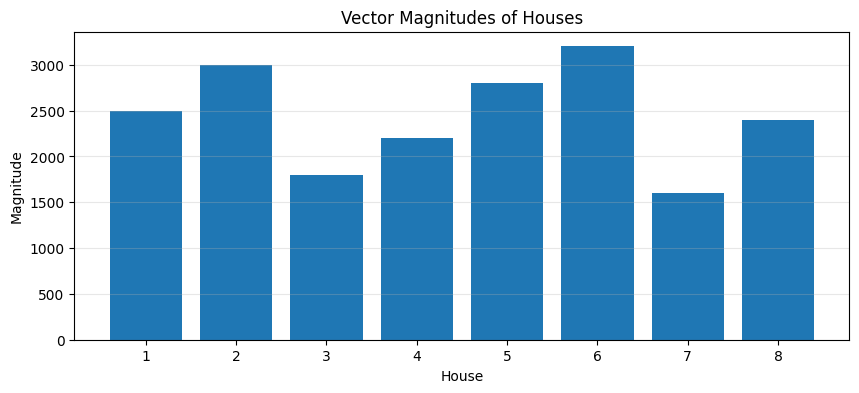

In [12]:
# Compute all magnitudes in parallel
magnitudes = batch.magnitudes()

print("Batch magnitudes (computed in parallel on GPU):")
for i, mag in enumerate(magnitudes):
    print(f"  House {i+1}: {mag:.4f}")

# Visualize
plt.figure(figsize=(10, 4))
plt.bar(range(1, len(magnitudes)+1), magnitudes.cpu().numpy())
plt.xlabel('House')
plt.ylabel('Magnitude')
plt.title('Vector Magnitudes of Houses')
plt.grid(axis='y', alpha=0.3)
plt.show()

### 4.2 Mean Vector

In [13]:
mean_house = batch.mean()
print(f"Mean vector: {mean_house}")
print(f"\nAverage house characteristics:")
print(f"  Square feet: {mean_house.get_component('sqft'):.1f}")
print(f"  Bedrooms: {mean_house.get_component('bedrooms'):.1f}")
print(f"  Age: {mean_house.get_component('age'):.1f} years")

Mean vector: GeometricVector(2437.5000*sqft + 3.1250*bedrooms + 20.6250*age)

Average house characteristics:
  Square feet: 2437.5
  Bedrooms: 3.1
  Age: 20.6 years


### 4.3 Pairwise Distances

Distance matrix shape: torch.Size([8, 8])

Sample distances:
  House 1 <-> House 2: 500.0260
  House 1 <-> House 3: 700.0721
  House 2 <-> House 3: 1200.0955


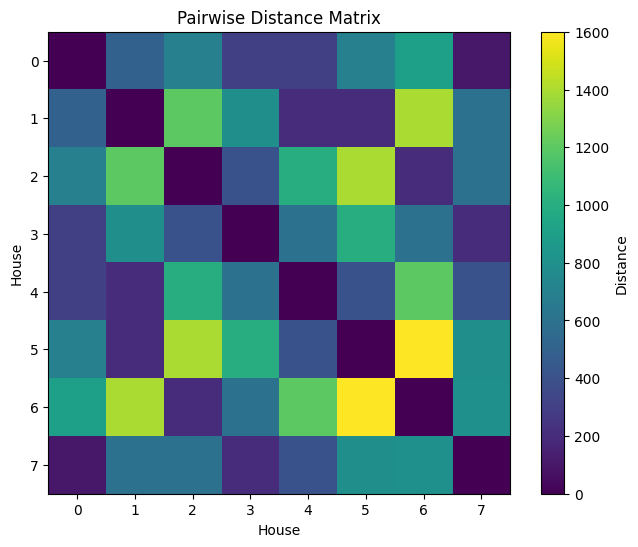

In [14]:
distances = batch.pairwise_distances()

print(f"Distance matrix shape: {distances.shape}")
print(f"\nSample distances:")
print(f"  House 1 <-> House 2: {distances[0, 1]:.4f}")
print(f"  House 1 <-> House 3: {distances[0, 2]:.4f}")
print(f"  House 2 <-> House 3: {distances[1, 2]:.4f}")

# Visualize distance matrix
plt.figure(figsize=(8, 6))
plt.imshow(distances.cpu().numpy(), cmap='viridis')
plt.colorbar(label='Distance')
plt.title('Pairwise Distance Matrix')
plt.xlabel('House')
plt.ylabel('House')
plt.show()

### 4.4 Gram Matrix (Similarity)

Gram matrix shape: torch.Size([8, 8])

Sample similarities (dot products):
  House 1 <-> House 2: 7500312.00
  House 1 <-> House 3: 4500606.00
  House 2 <-> House 3: 5400458.00


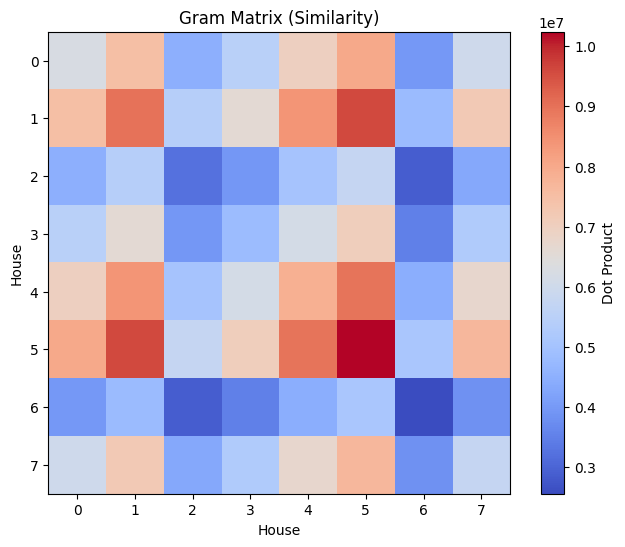

In [15]:
gram = batch.gram_matrix()

print(f"Gram matrix shape: {gram.shape}")
print(f"\nSample similarities (dot products):")
print(f"  House 1 <-> House 2: {gram[0, 1]:.2f}")
print(f"  House 1 <-> House 3: {gram[0, 2]:.2f}")
print(f"  House 2 <-> House 3: {gram[1, 2]:.2f}")

# Visualize Gram matrix
plt.figure(figsize=(8, 6))
plt.imshow(gram.cpu().numpy(), cmap='coolwarm')
plt.colorbar(label='Dot Product')
plt.title('Gram Matrix (Similarity)')
plt.xlabel('House')
plt.ylabel('House')
plt.show()

---
## Part 5: Custom Vector Spaces

Create vectors for any domain with any basis dimensions.

In [16]:
print("CUSTOM VECTOR SPACES\n")
print("=" * 70)

# Financial data
stock1 = GeometricVector(
    [150.25, 1200000, 0.15],
    ['price', 'volume', 'volatility']
)

stock2 = GeometricVector(
    [148.50, 1500000, 0.18],
    ['price', 'volume', 'volatility']
)

print(f"Stock 1: {stock1}")
print(f"Stock 2: {stock2}")

# Can safely add stocks
portfolio = stock1 + stock2
print(f"\nPortfolio: {portfolio}")

# Weather data
weather1 = GeometricVector(
    [72, 65, 1013],
    ['temperature', 'humidity', 'pressure']
)

weather2 = GeometricVector(
    [68, 70, 1015],
    ['temperature', 'humidity', 'pressure']
)

print(f"\nWeather 1: {weather1}")
print(f"Weather 2: {weather2}")

# Compute similarity
weather_sim = weather1.dot(weather2)
print(f"\nWeather similarity: {weather_sim:.2f}")

# But cannot mix stocks and weather!
print("\nTrying to add stock + weather...")
try:
    invalid = stock1 + weather1
except ValueError as e:
    print(f"✓ Correctly prevented: Different basis spaces!")

CUSTOM VECTOR SPACES

Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10
Stock 1: GeometricVector(150.2500*price + 1200000.0000*volume + 0.1500*volatility)
Stock 2: GeometricVector(148.5000*price + 1500000.0000*volume + 0.1800*volatility)

Portfolio: GeometricVector(298.7500*price + 2700000.0000*volume + 0.3300*volatility)
Using GPU: NVIDIA GB10
Using GPU: NVIDIA GB10

Weather 1: GeometricVector(72.0000*temperature + 65.0000*humidity + 1013.0000*pressure)
Weather 2: GeometricVector(68.0000*temperature + 70.0000*humidity + 1015.0000*pressure)

Weather similarity: 1037641.00

Trying to add stock + weather...
✓ Correctly prevented: Different basis spaces!


---
## Part 6: Practical Example - Finding Similar Houses

In [17]:
print("PRACTICAL EXAMPLE - Finding Similar Houses\n")
print("=" * 70)

# Query house
query = create_housing_vector(2600, 3, 18)
print(f"Query house: {query}\n")

# Find distances to all houses in batch
query_distances = []
for i, house in enumerate(houses):
    dist = torch.norm(query.values - house.values).item()
    query_distances.append((i+1, dist, house))

# Sort by distance
query_distances.sort(key=lambda x: x[1])

print("Most similar houses (by Euclidean distance):\n")
for rank, (house_num, dist, house) in enumerate(query_distances[:3], 1):
    print(f"{rank}. House {house_num} (distance: {dist:.4f})")
    print(f"   {house}\n")

PRACTICAL EXAMPLE - Finding Similar Houses

Using GPU: NVIDIA GB10
Query house: GeometricVector(2600.0000*sqft + 3.0000*bedrooms + 18.0000*age)

Most similar houses (by Euclidean distance):

1. House 1 (distance: 100.0200)
   GeometricVector(2500.0000*sqft + 3.0000*bedrooms + 20.0000*age)

2. House 8 (distance: 200.0000)
   GeometricVector(2400.0000*sqft + 3.0000*bedrooms + 18.0000*age)

3. House 5 (distance: 200.1225)
   GeometricVector(2800.0000*sqft + 3.0000*bedrooms + 25.0000*age)



---
## Part 7: Correlation Analysis with Wedge Products

In [18]:
print("CORRELATION ANALYSIS\n")
print("=" * 70)

# Analyze correlations between different house pairs
correlations = []

for i in range(min(5, len(houses))):
    for j in range(i+1, min(5, len(houses))):
        wedge = houses[i] ^ houses[j]
        corr_strength = wedge.correlation_strength()
        correlations.append(((i+1, j+1), corr_strength))

# Sort by correlation strength
correlations.sort(key=lambda x: x[1])

print("Most correlated pairs (lowest correlation strength):")
for (i, j), corr in correlations[:3]:
    print(f"  House {i} <-> House {j}: {corr:.6f}")

print("\nLeast correlated pairs (highest correlation strength):")
for (i, j), corr in correlations[-3:]:
    print(f"  House {i} <-> House {j}: {corr:.6f}")

print("\nInterpretation:")
print("  Lower values = more correlated (similar proportions)")
print("  Higher values = less correlated (different proportions)")

CORRELATION ANALYSIS

Most correlated pairs (lowest correlation strength):
  House 2 <-> House 4: 0.000456
  House 1 <-> House 5: 0.000937
  House 1 <-> House 2: 0.003003

Least correlated pairs (highest correlation strength):
  House 1 <-> House 3: 0.008666
  House 2 <-> House 3: 0.011667
  House 3 <-> House 4: 0.012122

Interpretation:
  Lower values = more correlated (similar proportions)
  Higher values = less correlated (different proportions)


---
## Summary

### Key Concepts

1. **The Scalar Trap**: Treating multi-dimensional data as raw numbers loses dimensional meaning

2. **Geometric Vectors**: Represent data as $\mathbf{x} = v_1\mathbf{e}_1 + v_2\mathbf{e}_2 + v_3\mathbf{e}_3$ where basis vectors maintain dimensional awareness

3. **Law of Non-Interaction**: Incompatible dimensions cannot be accidentally combined

4. **Wedge Product**: Captures relationships between vectors without collapsing dimensional information

5. **GPU Acceleration**: All operations leverage CUDA when available for maximum performance

### Benefits

- **Type Safety**: Prevents meaningless operations
- **Semantic Clarity**: Basis names make data interpretation explicit
- **Mathematical Rigor**: Operations follow geometric algebra principles
- **Performance**: GPU acceleration for batch operations
- **Flexibility**: Works with any domain and any basis dimensions

### Further Reading

- Original Article: https://agussudjianto.substack.com/p/the-great-embedding-escaping-the
- Source Code: geometric_vector.py
- Quick Examples: example_usage.py

---
## Exercises

Try these exercises to deepen your understanding:

1. Create your own vector space for a different domain (e.g., products, users, etc.)
2. Use wedge products to identify correlated features in a dataset
3. Build a simple recommendation system using geometric vectors
4. Experiment with higher-dimensional vectors (more than 3 basis dimensions)
5. Compare similarity measures: dot product vs. angle vs. wedge product

In [ ]:
# Your experiments here!
